# Installation

The pywapor package depends on several other packages, most of them get installed automatically when we install pywapor. The GDAL package needs to be installed manually however. Luckily, it is already installed on the backend computer used by Google Colab. We can verify that GDAL is installed by running the following commands.

In [ ]:
from osgeo import gdal
print("Using GDAL version:", gdal.__version__)

Now that we know that Python is able to import the GDAL package, we can install pywapor by running the following command.



In [ ]:
# !pip install pywapor_test==2.2.9 --quiet

If everything went well, we can now import pywapor in Python, let's try it (fingers crossed)!

In [1]:
import pywapor
print("Using pywapor version:", pywapor.__version__)

mpl backend: MacOSX
Using pywapor version: 2.3.0


# ETLook Input

In order to run the ETLook model, we first need to collect the necessary inputs. Two types of spatial data are required, temporal and static data. At the bottom of this notebook you can find a table specifying all the required inputs.

Each of these variables can be collected from whichever source you wish to use, as long as you make sure the units are correct, the data is stored as a GeoTIFF (1 band per file, 1 file for each variable and date), the files all have the same no-data-value and they all have the same projection and resolution.

For your convenience, the pywapor package has a function that can collect all this data from selected sources and make sure the data is stored in the correct format and folder structure. 

Because some of the data portals used require a user to login with a username and a password, we first need to set those up. Most importantly, we will need a `NASA Eearthdata Login` to be able to collect the MODIS, CHIRPS and MERRA2 datasets, which can be created [over here](https://urs.earthdata.nasa.gov/users/new).

> ⚠️
>
> After creating your account, you still need to accept some 'Terms of Use', before you can continue with this notebook. To do that, login to your newly created account and go to
>
> `Applications > Authorized Apps > Approve More Applications`
>
> There, make sure the two following applications are authorized:
> 1. `NASA GESDISC DATA ARCHIVE`
> 2. `LP DAAC Data Pool`
>
> ⚠️

Once you have your account set up, we can enter our username and password by running the following code.


In [ ]:
pywapor.collect.setup_dl_accounts.setup_account("NASA")

Next, we need a WAPOR API token. To get that token, you need to create an account [here](https://wapor.apps.fao.org/home/WAPOR_2/1) and then go to `My WaPOR > My Profile > API Token`. Once you have the token, we can add it to our pywapor accounts.

In [ ]:
pywapor.collect.setup_dl_accounts.setup_account("WAPOR")

First we define a `startdate` and `enddate`, our boundingbox through `latlim` and `lonlim` and we give a `project_folder` in which all our data will be stored. Here I've chosen an period of exactly 10 days which is the default composite length of pyWAPOR. To learn more about composites, check out the dedicated notebook here. The given boundingbox will show us the Fayoum irrigation scheme in Egypt.

Then we can run `pywapor.pre_et_look.main()` to start the downloading.

In [2]:
pywapor.__file__

'/Users/hmcoerver/miniconda3/envs/test_a/lib/python3.9/site-packages/pywapor_test-2.3.0-py3.9.egg/pywapor/__init__.py'

In [3]:
startdate = "2021-07-01"
enddate = "2021-07-10"
latlim = [28.9, 29.7]
lonlim = [30.2, 31.2]
project_folder = r"/Users/hmcoerver/pywapor_test"

pre_files = pywapor.pre_et_look.main(project_folder, startdate, enddate, latlim, lonlim)


#################
## PRE_ET_LOOK ##
#################

#### NDVI ####

Download 16-daily MODIS NDVI data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Download 16-daily MODIS NDVI data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### ALBEDO ####

Download daily MODIS Albedo data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### PRECIPITATION ####

Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### DEM ####

#### SLOPE ASPECT ####

#### LULC ####

#### METEO ####


slp:  86%|████████▌ | 60/70 [00:00<00:00, 968.63it/s]

## t2m ##
--> Reprojecting datasets.
--> Calculating composites.
## t2m-min ##
--> Reprojecting datasets.
--> Calculating composites.
## t2m-max ##
--> Reprojecting datasets.
--> Calculating composites.
## u2m ##
--> Reprojecting datasets.
--> Calculating composites.
## v2m ##
--> Reprojecting datasets.
--> Calculating composites.
## qv2m ##
--> Reprojecting datasets.
--> Calculating composites.
## tqv ##
## ps ##
## slp ##
--> Reprojecting datasets.
--> Calculating composites.

#################
## PRE_SE_ROOT ##
#################

#### NDVI ####

Download 16-daily MODIS NDVI data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Download 16-daily MODIS NDVI data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Exporting timeseries.

#### LST ####

Download daily MODIS land surface temperature data for period 2021-07-01 

slp: 100%|██████████| 217/217 [00:01<00:00, 191.77it/s]

## Pair_inst_0 ##
## Pair_inst ##
## qv_inst ##
## tair_inst ##
## wv_inst ##
## v2m_inst ##
## u2m_inst ##

#################
## PRE_SE_ROOT ##
##### DONE ######


#### SE_ROOT ####
--> Calculating se_root.


100%|██████████| 31/31 [00:00<00:00, 890.29it/s]


--> Reprojecting datasets.
--> Calculating composites.

#### LAT LON ####

#### SOLAR RADIATION ####

Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### TEMP. AMPLITUDE ####

#################
## PRE_ET_LOOK ##
##### DONE ######



After downloading the files, we can check if all the required files exist. Using the [`ls` unix command](https://en.wikipedia.org/wiki/Ls), we can see the contents of a folder, and with the asterices we can see the contents of recursive folders. Our `project_folder` now contains the following subdirectories and files.

> Actually, it also contains a folder called `RAW`, which you can see by running `!ls */*` instead. This folder holds some intermediate files that were used to create the final ETLook inputs.



In [4]:
!ls level_1*/*

level_1/metadata_level_1.json

level_1/20210701:
P_24_20210701.tif         r0_20210701.tif           t_air_max_24_20210701.tif
ndvi_20210701.tif         ra_24_20210701.tif        t_air_min_24_20210701.tif
p_air_24_0_20210701.tif   se_root_20210701.tif      u2m_24_20210701.tif
qv_24_20210701.tif        t_air_24_20210701.tif     v2m_24_20210701.tif

level_1/SMC:
SMC_-_-_inst_2021.07.01.09.24.tif SMC_-_-_inst_2021.07.06.08.00.tif
SMC_-_-_inst_2021.07.01.11.00.tif SMC_-_-_inst_2021.07.06.08.06.tif
SMC_-_-_inst_2021.07.01.11.06.tif SMC_-_-_inst_2021.07.06.11.18.tif
SMC_-_-_inst_2021.07.02.08.24.tif SMC_-_-_inst_2021.07.06.11.24.tif
SMC_-_-_inst_2021.07.02.08.30.tif SMC_-_-_inst_2021.07.07.08.48.tif
SMC_-_-_inst_2021.07.02.11.42.tif SMC_-_-_inst_2021.07.07.12.00.tif
SMC_-_-_inst_2021.07.02.11.48.tif SMC_-_-_inst_2021.07.07.12.06.tif
SMC_-_-_inst_2021.07.03.09.12.tif SMC_-_-_inst_2021.07.08.09.30.tif
SMC_-_-_inst_2021.07.03.10.48.tif SMC_-_-_inst_2021.07.08.11.06.tif
SMC_-_-_inst_2021.07.03.1

Besides the tif files, which we need as input for ETLook, a json file has also been created (named `metadata_level_1.json` here). It contains information on how the input files were created. We can check the file like this.

In [5]:
!python -m json.tool level_1/metadata_level_1.json

{
    "pywapor_version": "2.3.0",
    "created": "11/19/2021, 12:56:53",
    "template_file": "/Users/hmcoerver/pywapor_test/RAW/MODIS/MOD13/NDVI_MOD13Q1_-_16-daily_2021.06.26.tif",
    "geotransform": "[30.19847367188096, 0.0019653699789507215, 0.0, 29.7012637605054, 0.0, -0.0019653699789507215]",
    "resolution": "[510, 408]",
    "inputs": {
        "latlim": "[28.799999999999997, 29.8]",
        "lonlim": "[30.099999999999998, 31.3]",
        "startdate": "2021-07-01",
        "enddate": "2021-07-10",
        "source_selection_name": "level_1",
        "project_folder": "/Users/hmcoerver/pywapor_test"
    },
    "sources": {
        "METEO": [
            "GEOS5"
        ],
        "NDVI": [
            "MOD13",
            "MYD13"
        ],
        "ALBEDO": [
            "MDC43"
        ],
        "LST": [
            "MOD11",
            "MYD11"
        ],
        "LULC": [
            "WAPOR"
        ],
        "DEM": [
            "SRTM"
        ],
        "PRECIPITATION": [

Now that we know that all the required files exist, it is also a good idea to check if there is any data inside those files! For all we know right now, they might just be a bunch of empty files.

We can create a simple map using the code below.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
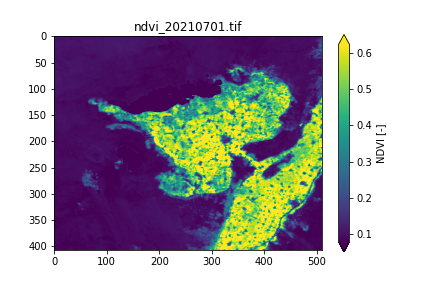

In [9]:
tif_file = pre_files["ndvi"][0]
quantity = "NDVI"
unit = "[-]"

pywapor.post_et_look.plot_tif(tif_file, quantity, unit)

Now that we have all the required input files its time to run the actual model!

# Running ETLook

To run the model, we need to give at least two inputs to `pywapor.et_look_code.main()`:

1.   The `project_folder`, wich we already defined.
2.   And the specific `date` for which to run the model. Here we'll use `startdate`.

In [10]:
files = pywapor.et_look.main(project_folder, startdate)

--> Running ETLook_v2
----> u_24 will be calculated from u2m_24 and v2m_24.
----> trans_24 will be calculated from ra_24.
----> z_oro will be calculated from slope.
----> lw_offset will be constant at -4.7000.
----> lw_slope will be constant at 6.9900.
----> r0_bare will be constant at 0.2650.
----> r0_full will be constant at 0.2540.
----> rn_offset will be constant at -209.7740.
----> rn_slope will be constant at 1.3940.
----> t_opt will be constant at 23.0970.
----> vpd_slope will be constant at -0.3000.
----> resolution is ~205 meter.


You'll see an message indicating that `'se_root'` was `not found`. This is no problem, ETLook can calculate `se_root` with the inputs we've provided, but it can also be given as input in case you have some great soil moisture dataset lying around.

Now that the model is finished, we can check again if any new files have been created, just like we did before.

In [11]:
!ls out_level_1*/*

e_24_mm_20210701.tif      et_ref_24_mm_20210701.tif se_root_20210701.tif
et_24_mm_20210701.tif     int_mm_20210701.tif       t_24_mm_20210701.tif


If everything went well, there should be a new folder called `out_level_1`, showing several output files that have been created.



# ETLook Output

Like we did before, we can plot a map by giving a path to a tif-file.

In [13]:
tif_file = files["et_24_mm"]
quantity = "Evapotranspiration"
unit = "[mm/day]"

pywapor.post_et_look.plot_tif(tif_file, quantity, unit)

True


Or we can open the map to calculate some statistics.

In [14]:
import numpy as np

array = pywapor.general.processing_functions.open_as_array(tif_file)

print("resolution:", array.shape)
print("total pixels:", array.size)
print("number of pixels with missing data:", np.sum(np.isnan(array)))
print("maximum value: {0:.2f}".format(np.nanmax(array)))
print("minimum value: {0:.2f}".format(np.nanmin(array)))
print("mean: {0:.2f}".format(np.nanmean(array)))
print("median: {0:.2f}".format(np.nanmedian(array)))

resolution: (408, 510)
total pixels: 208080
number of pixels with missing data: 844
maximum value: 9.14
minimum value: 0.11
mean: 2.05
median: 0.38


# Input configurations

## Level-2 inputs

Now that we have run ETLook for a simple use case, we'll have a look at how to run it at different levels or with different input datasets.

When downloading input data with `pywapor.pre_et_look.main` as we did before, it is possible to select a level for which to download data. By default, this level is set to `level_1`.

We can have a closer look at what this actually means by running the following functions.






In [16]:
level = "level_1"
levels = pywapor.general.variables.get_source_level_selections()
pywapor.post_et_look.prettyprint(levels[level])

AttributeError: module 'pywapor.post_et_look' has no attribute 'prettyprint'

You can see here which datasets are used for each (type of) variable. For example, the NDVI map we've used as input to ETLook was created using data from `MOD13` and `MYD13`. Notice that this information was also stored in the metadata (json) file that we've looked at earlier.

We can check which other levels are available in this version of `pywapor` by checking the keys in the levels dictionary we've just created.

In [17]:
print(levels.keys())

dict_keys(['level_1', 'level_2'])


Let's have a look at the datasets used for `level_2`.

In [ ]:
level = "level_2"
pywapor.post_et_look.prettyprint(levels[level])

As you can see, the difference between `level_1` and `level_2` is the dataset used to create the NDVI and ALBEDO inputs. For `level_2`, they are derived from PROBA-V images, which have a higher resolution than the MODIS products.

Let's give `level_2` a try! Beware though, that the downloading of the PROBA-V images can take some time! 

> ⚠️  
>
> You'll notice that you'll be prompted for another username and password. This time for a [VITO account](https://www.vito-eodata.be/PDF/portal/Application.html). We could set this account up by running `pywapor.collect.setup_dl_accounts.setup_account("VITO")` as well (like we did before for the NASA and WAPOR accounts). But `pywapor.pre_et_look.main` also checks if the required accounts can be found and gives a prompt if thats's not the case. 
>
>You can create a VITO account [here](https://www.vito-eodata.be/PDF/portal/Application.html).
>
> ⚠️  


In [18]:
level = "level_2"
pre_files_lvl2 = pywapor.pre_et_look.main(project_folder, startdate, enddate, latlim, lonlim, level)


#################
## PRE_ET_LOOK ##
#################

#### NDVI ####


2021.07.16:               : 100%|██████████| 22.0/22.0 [00:56<00:00,  2.56s/days]


--> Reprojecting datasets.
--> Calculating composites.

#### ALBEDO ####


2021.07.16:               : 100%|██████████| 22.0/22.0 [00:56<00:00,  2.55s/days]

--> Reprojecting datasets.


--> Calculating composites.

#### PRECIPITATION ####

Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### DEM ####

#### SLOPE ASPECT ####

#### LULC ####

#### METEO ####


slp:  86%|████████▌ | 60/70 [00:00<00:00, 2614.52it/s]

## t2m ##
--> Reprojecting datasets.
--> Calculating composites.
## t2m-min ##
--> Reprojecting datasets.
--> Calculating composites.
## t2m-max ##
--> Reprojecting datasets.
--> Calculating composites.
## u2m ##
--> Reprojecting datasets.
--> Calculating composites.
## v2m ##
--> Reprojecting datasets.
--> Calculating composites.
## qv2m ##
--> Reprojecting datasets.
--> Calculating composites.
## tqv ##
## ps ##
## slp ##
--> Reprojecting datasets.
--> Calculating composites.

#################
## PRE_SE_ROOT ##
#################

#### NDVI ####


2021.07.16:               : 100%|██████████| 22.0/22.0 [00:54<00:00,  2.46s/days]


--> Reprojecting datasets.
--> Exporting timeseries.

#### LST ####

Download daily MODIS land surface temperature data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Download daily MODIS land surface temperature data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete

#### DEM ####

#### METEO ####


slp: 100%|██████████| 217/217 [00:01<00:00, 215.41it/s]

## Pair_inst_0 ##
## Pair_inst ##
## qv_inst ##
## tair_inst ##
## wv_inst ##
## v2m_inst ##
## u2m_inst ##

#################
## PRE_SE_ROOT ##
##### DONE ######


#### SE_ROOT ####
--> Calculating se_root.


100%|██████████| 31/31 [00:00<00:00, 226.37it/s]


--> Reprojecting datasets.
--> Calculating composites.
[########################################] | 100% Completed |  1min 15.1s

#### LAT LON ####

#### SOLAR RADIATION ####

Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### TEMP. AMPLITUDE ####

#################
## PRE_ET_LOOK ##
##### DONE ######



Downloading and processing the PROBA-V scenes will take quite some time as they are relatively large. But since we've already downloaded the other datasets for `level_1`, the function will find much of the other required datasets in the aforementioned `RAW` folder and won't have to download them again.

We can check the contents of our `project_folder` again by running the following code.

In [19]:
!ls level_2*/*

level_2/metadata_level_2.json

level_2/20210701:
P_24_20210701.tif         r0_20210701.tif           t_air_max_24_20210701.tif
ndvi_20210701.tif         ra_24_20210701.tif        t_air_min_24_20210701.tif
p_air_24_0_20210701.tif   se_root_20210701.tif      u2m_24_20210701.tif
qv_24_20210701.tif        t_air_24_20210701.tif     v2m_24_20210701.tif

level_2/SMC:
SMC_-_-_inst_2021.07.01.09.24.tif SMC_-_-_inst_2021.07.06.08.00.tif
SMC_-_-_inst_2021.07.01.11.00.tif SMC_-_-_inst_2021.07.06.08.06.tif
SMC_-_-_inst_2021.07.01.11.06.tif SMC_-_-_inst_2021.07.06.11.18.tif
SMC_-_-_inst_2021.07.02.08.24.tif SMC_-_-_inst_2021.07.06.11.24.tif
SMC_-_-_inst_2021.07.02.08.30.tif SMC_-_-_inst_2021.07.07.08.48.tif
SMC_-_-_inst_2021.07.02.11.42.tif SMC_-_-_inst_2021.07.07.12.00.tif
SMC_-_-_inst_2021.07.02.11.48.tif SMC_-_-_inst_2021.07.07.12.06.tif
SMC_-_-_inst_2021.07.03.09.12.tif SMC_-_-_inst_2021.07.08.09.30.tif
SMC_-_-_inst_2021.07.03.10.48.tif SMC_-_-_inst_2021.07.08.11.06.tif
SMC_-_-_inst_2021.07.03.1

Next, we can run ETLook using the `level_2` data like this.

In [20]:
files_lvl2 = pywapor.et_look.main(project_folder, startdate, level)

--> Running ETLook_v2
----> u_24 will be calculated from u2m_24 and v2m_24.
----> trans_24 will be calculated from ra_24.
----> z_oro will be calculated from slope.
----> lw_offset will be constant at -4.7000.
----> lw_slope will be constant at 6.9900.
----> r0_bare will be constant at 0.2650.
----> r0_full will be constant at 0.2540.
----> rn_offset will be constant at -209.7740.
----> rn_slope will be constant at 1.3940.
----> t_opt will be constant at 23.0970.
----> vpd_slope will be constant at -0.3000.
----> resolution is ~103 meter.


We can check the pixel size in degrees of the `level_1` and `level_2` outputs like this.

In [21]:
level_1_file = files["et_24_mm"]
level_2_file = files_lvl2["et_24_mm"]

l1_xres = pywapor.general.processing_functions.get_geoinfo(level_1_file)[0][1]
l2_xres = pywapor.general.processing_functions.get_geoinfo(level_2_file)[0][1]

print("Resolution level_1: {0:.4f}°".format(l1_xres))
print("           level_2: {0:.4f}°".format(l2_xres))

Resolution level_1: 0.0020°
           level_2: 0.0010°


## Custom inputs

Besides using the predefined levels, it is also possible to create your own custom level. Instead of passing a string to the `level` input parameter of `pywapor.pre_et_look.main`, we can also pass a dictionary that specifies which products we would like to use.

Lets start by creating such a dictionary by choosing some sources from this table.


| Source | Temporal Availability | Temporal Resolution |Spatial Resolution | Used For |
| ------ | ------ | ------ | ------ | ------ |
|[MOD13](https://lpdaac.usgs.gov/products/mod13q1v006/) | 2000-02-18 - ongoing | 16-Daily |250m|NDVI|
|[MYD13](https://lpdaac.usgs.gov/products/myd13q1v006/) | 2002-07-04 - ongoing | 16-Daily |250m|NDVI|
|[MCD43](https://lpdaac.usgs.gov/products/mcd43a1v006/)|2000-02-16 - ongoing|Daily|500m|Albedo|
|[MOD11](https://lpdaac.usgs.gov/products/mod11a1v006/) | 2000-02-24 - ongoing | Daily | 1000m | LST |
|[MYD11](https://lpdaac.usgs.gov/products/myd11a1v006/)| 2002-07-04 - ongoing | Daily | 1000m | LST |
|[PROBAV](https://www.vito-eodata.be/collectioncatalogue/srv/eng/catalog.search#/metadata/urn:ogc:def:EOP:VITO:PROBAV_S5-TOC_100M_V001)|2014-03-11 - ongoing|5-Daily|100m|NDVI, Albedo|
| [GEOS5](https://geos5.org) | 2017-12-01 - ongoing | 3-Hourly |0.3125°×0.25° | Meteo |
| [MERRA2](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/) | 1980-01-01 - ongoing | Hourly | 0.625°×0.5° | Meteo | 
| [CHIRPS](https://www.chc.ucsb.edu/data/chirps) |  1981-01-01 - ongoing | Daily | 0.05° | Precipitation |
| [WAPOR](https://wapor.apps.fao.org/catalog/WAPOR_2/1/L1_LCC_A) | 2009 - 2020 | Yearly |250m | Landcover |
| [GLOBCOVER](http://due.esrin.esa.int/page_globcover.php) | 2009 | Single| 250m | Landcover |
| [SRTM](https://srtm.csi.cgiar.org) | 2009 | Single | 90m | DEM |


In [22]:
my_custom_level = {
        "METEO": ["MERRA2"],
        "NDVI": ["PROBAV"],
        "ALBEDO": ["MDC43"],
        "LST": ["MOD11", "MYD11"],
        "LULC": ["GLOBCOVER"],
        "DEM": ["SRTM"],
        "TRANS": ["MERRA2"],
        "PRECIPITATION": ["CHIRPS"],
}

We can check if it is possible to run `pywapor.pre_et_look.main` and `pywapor.et_look.main` with this custom level for a chosen start and enddate by passing it into the following function.

In [23]:
results, succes = pywapor.general.tests.check_source_selection(my_custom_level, 
                                                        startdate, enddate)
print(f"valid custom level: {succes}")

valid custom level: True


Now our custom level is ready! We can have a closer look at the the checks that the function performed by looking at the `results` variable.

In [24]:
pywapor.post_et_look.prettyprint(results)

AttributeError: module 'pywapor.post_et_look' has no attribute 'prettyprint'

As you can see, the function also checks if the selected sources are available for the chosen dates. 

Finally, we can give a name to the custom level (but this is not required, the default name is `custom`) and then start downloading the required data.

In [25]:
my_custom_level["name"] = "my_first_custom_level"

pre_files_cstm = pywapor.pre_et_look.main(project_folder, startdate, enddate, latlim, lonlim, my_custom_level)


#################
## PRE_ET_LOOK ##
#################

#### NDVI ####


2021.07.16:               : 100%|██████████| 22.0/22.0 [00:55<00:00,  2.52s/days]


--> Reprojecting datasets.
--> Calculating composites.

#### ALBEDO ####

Download daily MODIS Albedo data for period 2021-07-01 till 2021-07-10
Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### PRECIPITATION ####

Progress: |██████████████████████████████████████████████████| 100.0% Complete
--> Reprojecting datasets.
--> Calculating composites.

#### DEM ####

#### SLOPE ASPECT ####

#### LULC ####

Download Globcover landcover map
Progress: |██████████████████████████████████████████████████| 100.0% Complete

#### METEO ####

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |████████████████████████████████████████████

And then again, run ETLook like this.

> ⚠️  
>
> Note that here we don't pass the dictionary, but the name of the level as the level selector!
>
> ⚠️  



In [ ]:
files_cstm = pywapor.et_look.main(project_folder, startdate, "my_first_custom_level")